In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Courses\Data-Science_Tech\INeuron_Courses\MACHING_LEARNING_LIVE-CLASS\PROJECT\ML_CODE\ML_Live_Class\data\mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

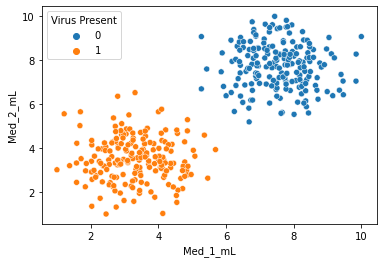

In [4]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data = df,hue = 'Virus Present')

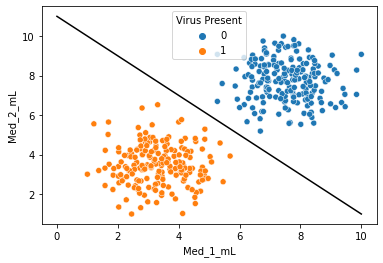

In [6]:
# Creating hyperplane manually
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data = df,hue = 'Virus Present')

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x+b

plt.plot(x,y,'black')

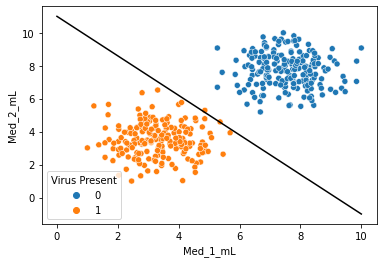

In [7]:
# Creating hyperplane manually
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data = df,hue = 'Virus Present')

x = np.linspace(0,10,100)
m = -1.2
b = 11
y = m*x+b

plt.plot(x,y,'black')

In [8]:
from sklearn.svm import SVC

In [12]:
X = df.drop('Virus Present',axis=1)
y = df['Virus Present']

In [13]:
model = SVC(kernel = 'poly',C =1000)
model.fit(X,y)

SVC(C=1000, kernel='poly')

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()


C:\Users\SREEKANTH\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


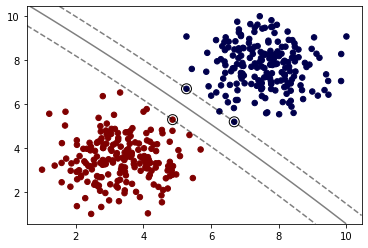

In [16]:
plot_svm_boundary(model,X,y)

C:\Users\SREEKANTH\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


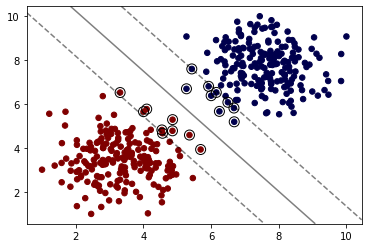

In [17]:
model = SVC(kernel= 'linear',C = 0.05)
model.fit(X,y)

plot_svm_boundary(model,X,y)

C:\Users\SREEKANTH\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


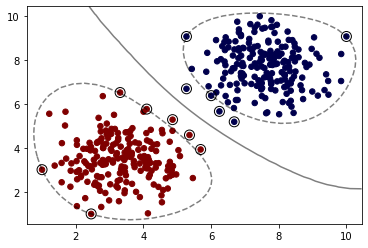

In [18]:
model = SVC(kernel= 'rbf',C = 1)
model.fit(X,y)

plot_svm_boundary(model,X,y)

C:\Users\SREEKANTH\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


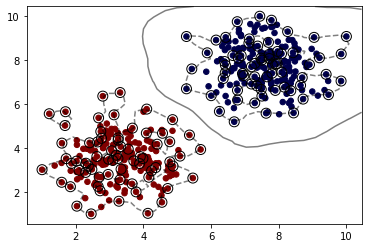

In [26]:
model = SVC(kernel= 'rbf',C = 1,gamma=2) # As Gamma value is increasing it fits more support vectors near the margin
model.fit(X,y)

plot_svm_boundary(model,X,y)

C:\Users\SREEKANTH\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


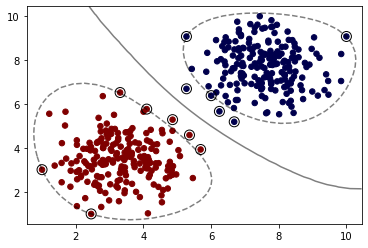

In [27]:
model = SVC(kernel= 'rbf',C = 1,gamma='scale') 
model.fit(X,y)

plot_svm_boundary(model,X,y)

C:\Users\SREEKANTH\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


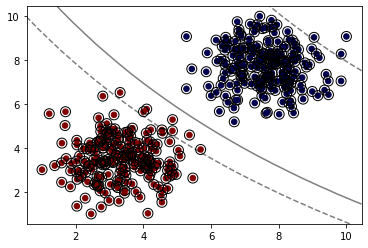

In [29]:
model = SVC(kernel= 'sigmoid',C = 1,gamma='scale') # Sigmoid kernel function took all points as Support Vectors
model.fit(X,y)

plot_svm_boundary(model,X,y)

C:\Users\SREEKANTH\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


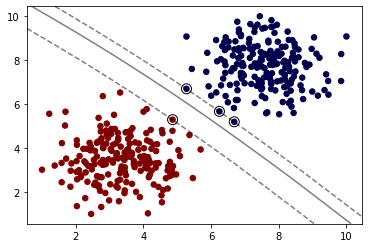

In [31]:
model = SVC(kernel= 'poly',degree=9,C = 1,gamma='scale') 
model.fit(X,y)

plot_svm_boundary(model,X,y)

In [36]:
from sklearn.model_selection import GridSearchCV

svm_model = SVC()

param_grid = {'C':[0.01,1,2],'kernel':['linear','rbf','sigmoid','poly']}

In [37]:
grid_model = GridSearchCV(svm_model,param_grid)
grid_model.fit(X,y)



GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 1, 2],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [38]:
grid_model.best_params_

{'C': 0.01, 'kernel': 'linear'}